In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

### Load the dataset

In [2]:
train = pd.read_csv("../Logistic Regression/Titanic_train.csv")
test = pd.read_csv("../Logistic Regression/Titanic_test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Numerical column representation

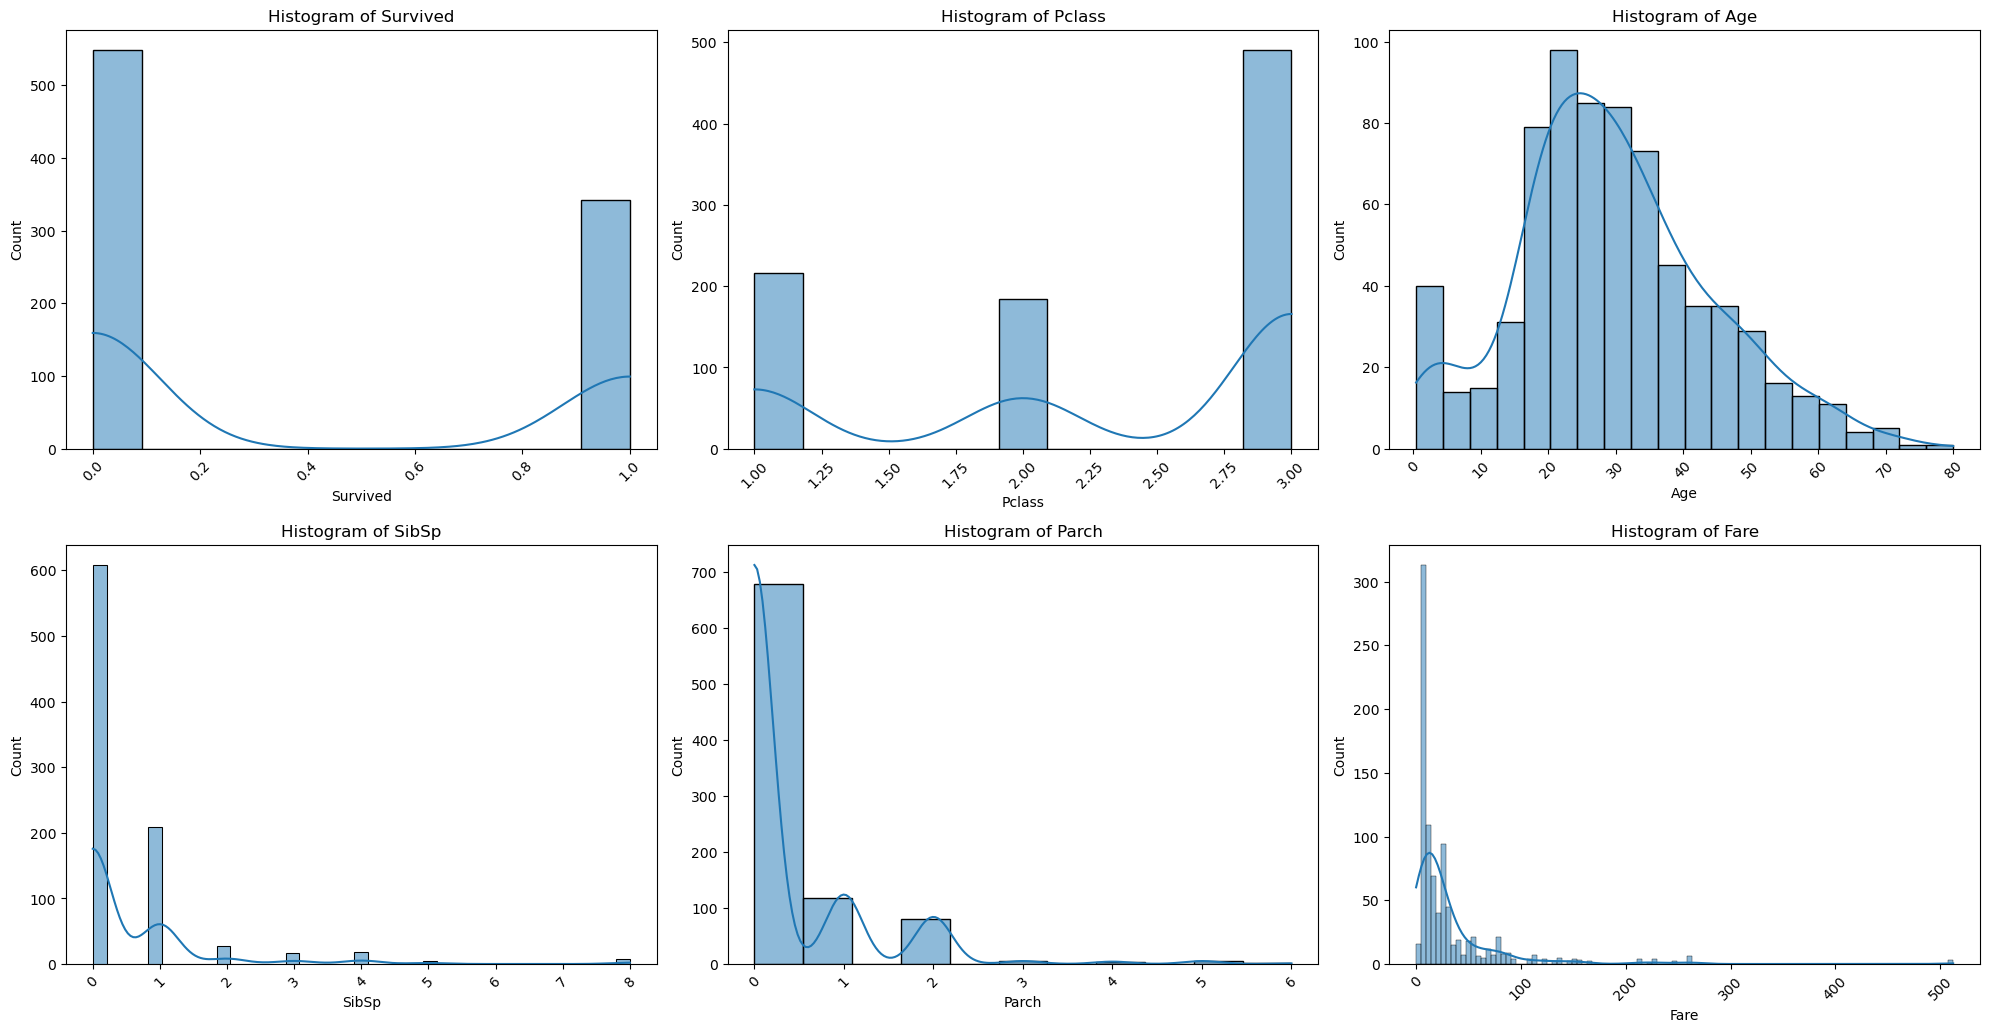

In [4]:
numeric_cols = train.select_dtypes(include=['number']).drop('PassengerId', axis=1)
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3,3,i)
    sns.histplot(data=train, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Categorical column representation

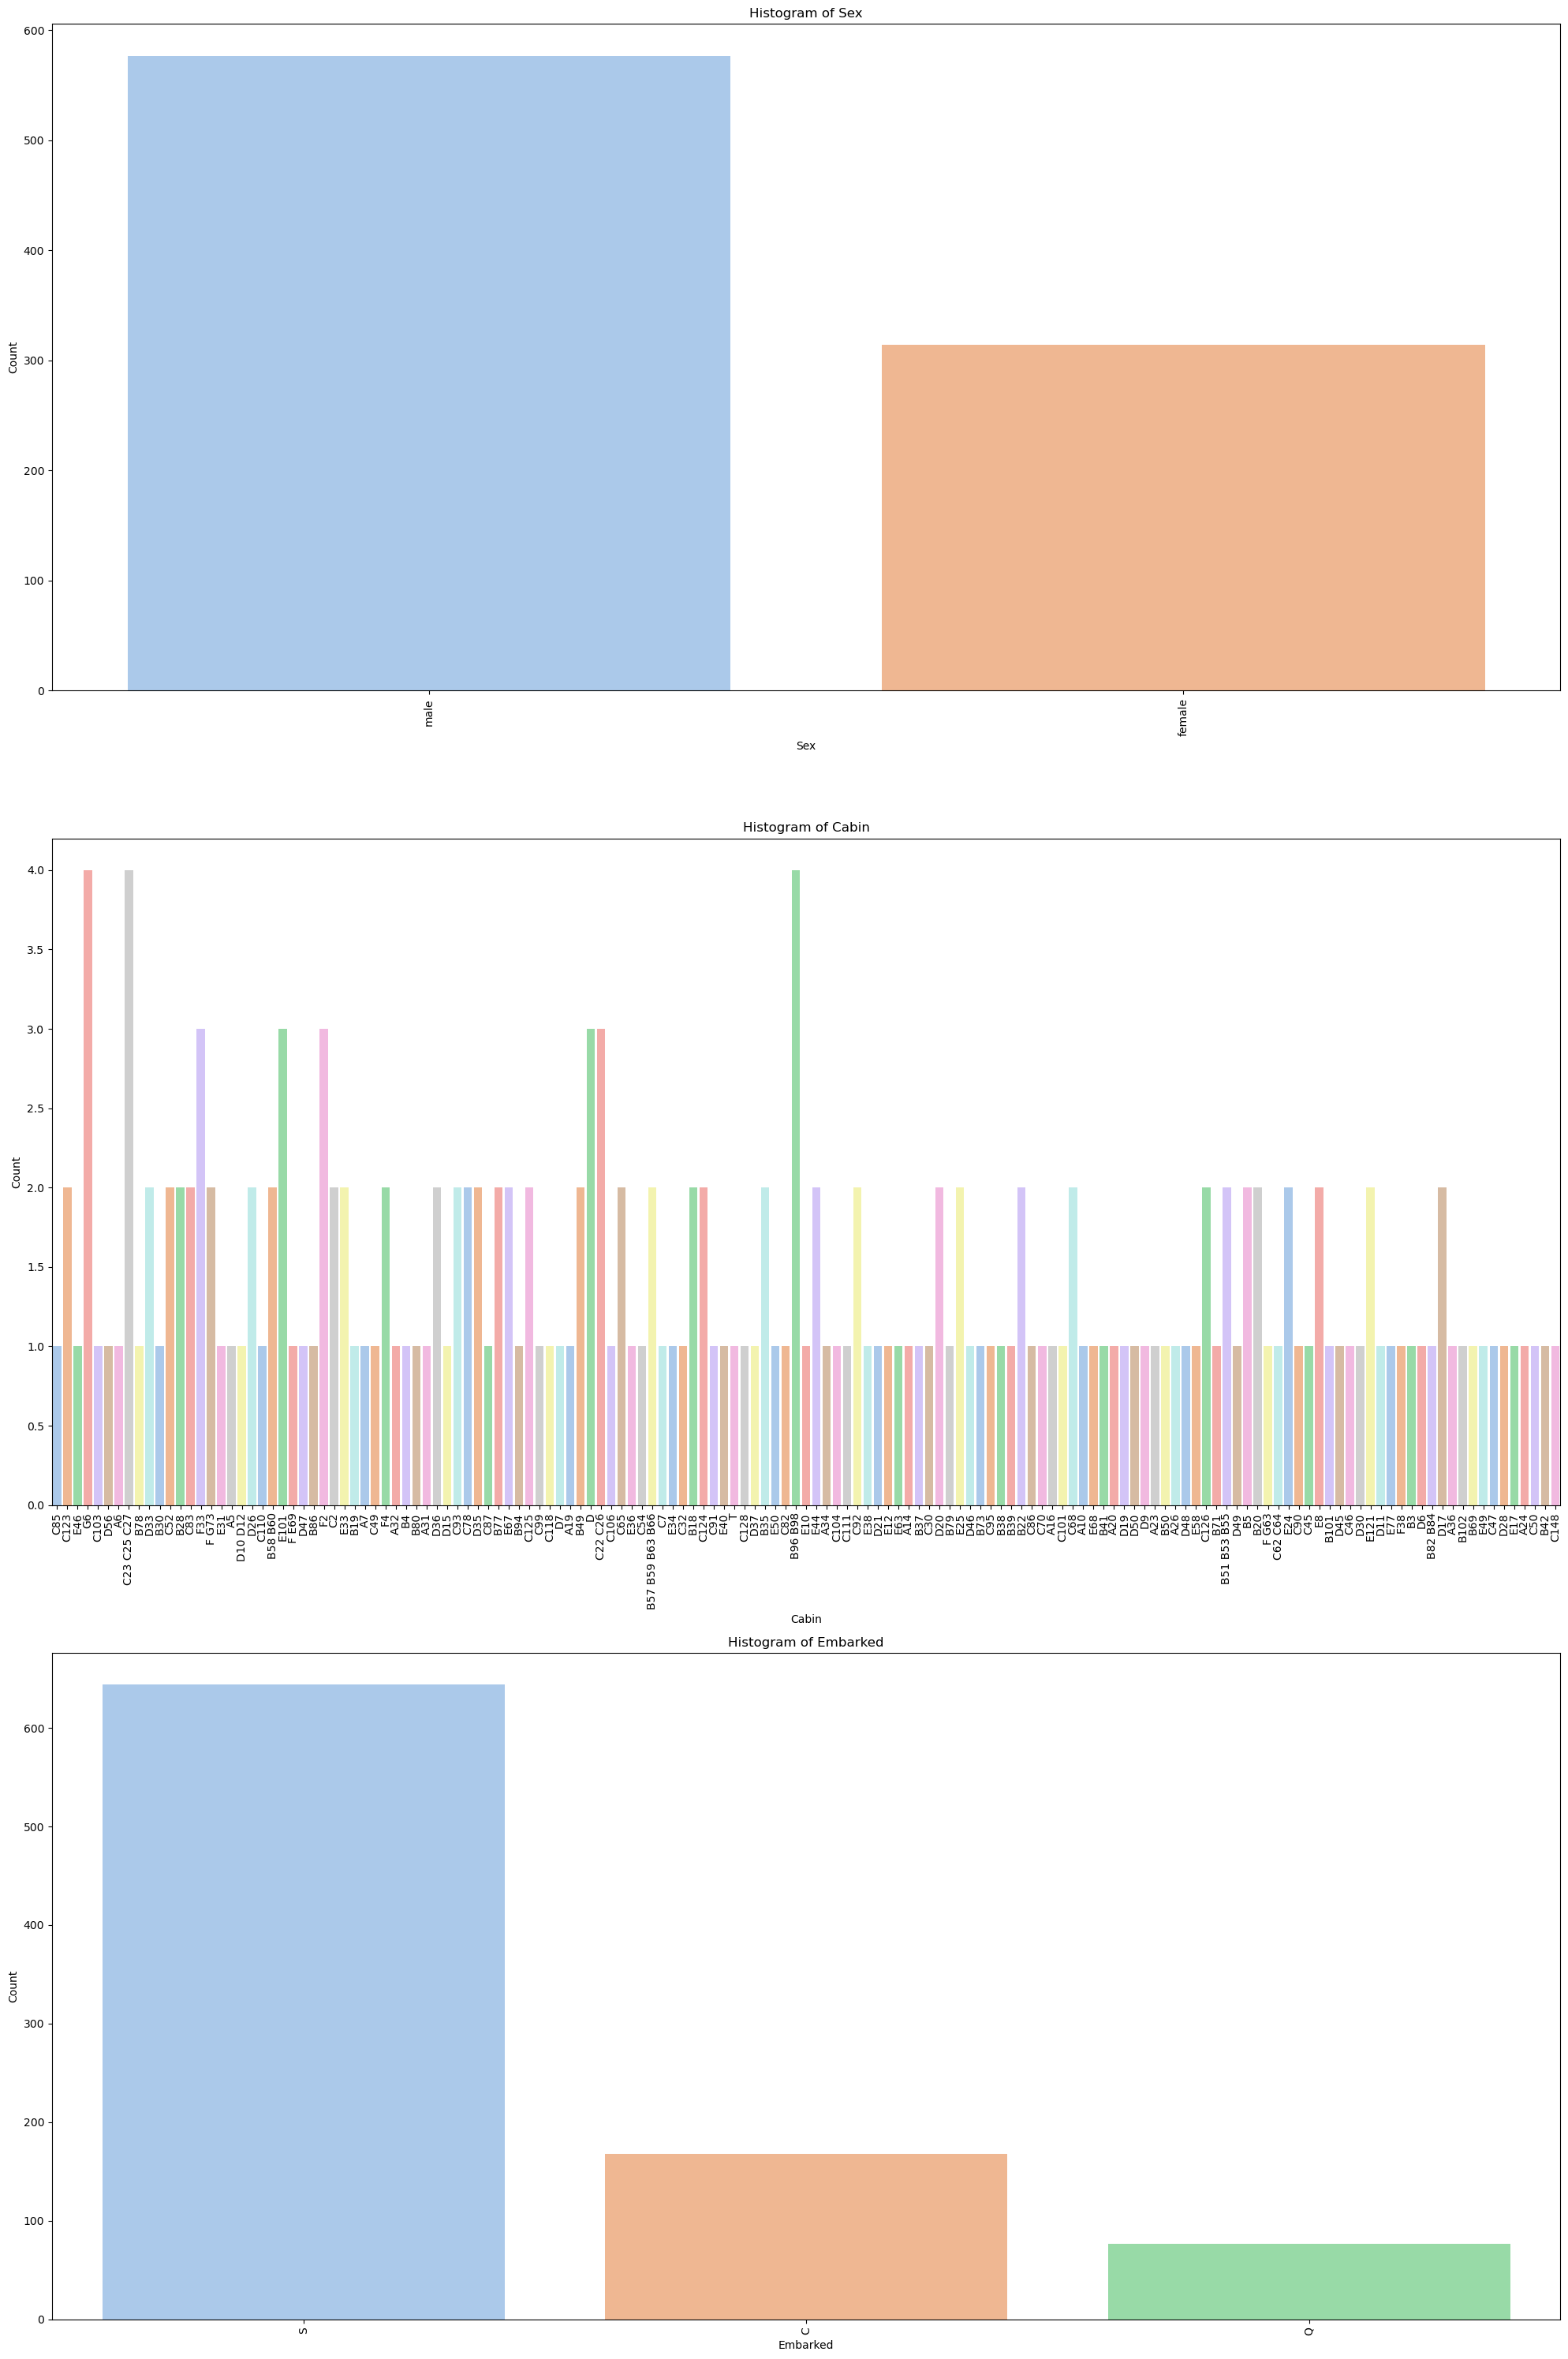

In [5]:
categorical_col = train[['Sex','Cabin','Embarked']]
plt.figure(figsize=(20, 30))
for i, col in enumerate(categorical_col, 1):
    plt.subplot(3,1,i)
    sns.countplot(data=train, x=col, hue=col, palette='pastel', legend=False)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Basic info

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Summary statistics

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Check for missing values

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Visualizations

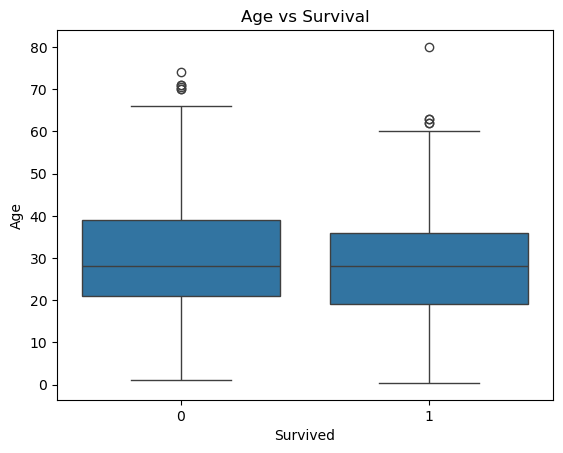

In [9]:
sns.boxplot(data=train, x='Survived', y='Age')
plt.title('Age vs Survival')
plt.show()

# Data Preprocessing

### Fill missing Age with median

In [10]:
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

/var/folders/4c/_fs19v_93j72_br0ld44cq1m0000gn/T/ipykernel_8634/3278935906.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
/var/folders/4c/_fs19v_93j72_br0ld44cq1m0000gn/T/ipykernel_8634/3278935906.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

### Fill missing Embarked with mode

In [11]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

/var/folders/4c/_fs19v_93j72_br0ld44cq1m0000gn/T/ipykernel_8634/2166674729.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
/var/folders/4c/_fs19v_93j72_br0ld44cq1m0000gn/T/ipykernel_8634/2166674729.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

### Fill missing Fare in test data

In [12]:
test['Fare'].fillna(test['Fare'].median(), inplace=True)

/var/folders/4c/_fs19v_93j72_br0ld44cq1m0000gn/T/ipykernel_8634/3907505379.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(test['Fare'].median(), inplace=True)


### Drop Cabin (too many missing values)

In [13]:
train.drop(columns=['Cabin'], inplace=True)
test.drop(columns=['Cabin'], inplace=True)

### Convert categorical variables

In [14]:
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Sex', 'Embarked'], drop_first=True)

### Align columns (drop columns not in both datasets)

In [15]:
X_train = train[['Pclass', 'Age', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y_train = train['Survived']

X_test = test[['Pclass', 'Age', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]

# Model Building

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

### Build and train model

In [17]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Predict on train (just to evaluate)

In [18]:
y_pred = model.predict(X_train)
y_prob = model.predict_proba(X_train)[:, 1]

# Model Evaluation

In [19]:
print("Accuracy:", accuracy_score(y_train, y_pred))
print("Precision:", precision_score(y_train, y_pred))
print("Recall:", recall_score(y_train, y_pred))
print("F1 Score:", f1_score(y_train, y_pred))
print("ROC AUC Score:", roc_auc_score(y_train, y_prob))

Accuracy: 0.7901234567901234
Precision: 0.7370030581039755
Recall: 0.7046783625730995
F1 Score: 0.7204783258594918
ROC AUC Score: 0.8524643423981934


### ROC Curve

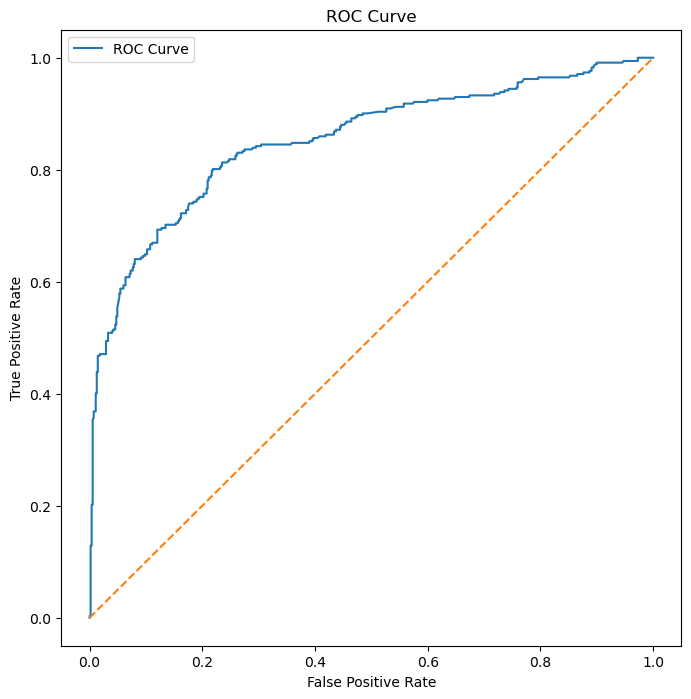

In [23]:
fpr, tpr, _ = roc_curve(y_train, y_prob)
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### Coefficients

In [21]:
coeff_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_[0]})
print(coeff_df)

      Feature  Coefficient
0      Pclass    -1.132723
1         Age    -0.032713
2        Fare     0.000064
3    Sex_male    -2.490754
4  Embarked_Q     0.007109
5  Embarked_S    -0.476756


1. Pclass = -0.85
   - Higher class (like 1st class) means lower Pclass number.
   - Since it's negative, people in lower classes (higher number) were less likely to survive.
2. Age = -0.03
   - Older people had slightly less chance of survival.
3. Fare = 0.015
   - People who paid higher fares were more likely to survive (probably richer passengers).
4. Sex_male = -2.5
   - Being male strongly decreases survival chance (since women and children were saved first).
5. Embarked_Q = 0.4 and Embarked_S = -0.3
   - People who boarded at Q had slightly better chances, while S had slightly worse.
   - These numbers are compared to a baseline category (which is Embarked_C, since we dropped it while encoding).

### Discuss the Significance of Features in Predicting the Target Variable

In logistic regression, each feature contributes differently to predicting whether a passenger survived or not. The model uses these features to estimate the probability of survival. Let’s look at the significance of key features in the Titanic dataset:

1. Sex (Gender)
* One of the most significant predictors.
* Females had a much higher chance of survival compared to males.
* This aligns with the real Titanic policy: “Women and children first.”

2. Pclass (Passenger Class)
* First-class passengers had better survival chances than second or third class
* Third-class passengers had the lowest chance of survival due to less access to lifeboats and crowded conditions.

3. Age
* Age has a moderate effect.
* Younger passengers, especially children, had a slightly better chance of survival
* Older passengers were less likely to survive, possibly due to lower mobility or health.

4. Fare
* Higher fare indicates a more expensive ticket, often linked to first-class travel
* Passengers who paid higher fares generally had better survival chances.

5. Embarked (Port of Boarding)
* The port where a passenger boarded (C, Q, or S) shows a minor effect on survival.
* It may reflect differences in crowd levels, class distribution, or demographics at each port.

| Feature  | Significance in Prediction                   |
| -------- | -------------------------------------------- |
| Sex      | Strong (Females much more likely to survive) |
| Pclass   | Strong (1st class had better chances)        |
| Age      | Moderate (Younger passengers more likely)    |
| Fare     | Moderate (Higher fare → higher chance)       |
| Embarked | Low (minor differences based on port)        |


# Deployment with Streamlit

### To save model

In [22]:
import pickle

# Saving trained model
with open('titanic_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Interview Questions

#### 1. What is the difference between precision and recall?

Precision and Recall are two important metrics used to evaluate the performance of classification models, especially when the classes are imbalanced.

**Precision**
* Precision measures how many of the predicted positive cases were actually correct.
* It answers the question:
"Out of all the passengers the model predicted would survive, how many actually did?"

**Use case:**
Useful when false positives are more critical to avoid.
Example: In email spam detection, we want to avoid marking real emails as spam.

**Recall**
* Recall measures how many of the actual positive cases were correctly predicted.
* It answers the question:
"Out of all the passengers who actually survived, how many did the model correctly identify?"

**Use case:**
Useful when false negatives are more critical to avoid.
Example: In medical diagnosis, we want to avoid missing a disease in patients who actually have it.

**Simple Example (Titanic Dataset)**
* Suppose 100 people survived.
* The model predicted 70 would survive.
* Out of those 70, only 50 actually survived.

**Then:**
* Precision = 50 / 70 = how many predicted survivors were correct
* Recall = 50 / 100 = how many actual survivors were found

#### 2. What is cross-validation, and why is it important in binary classification?

**Cross-validation** is a technique used to test the performance of a machine learning model in a reliable way. It helps ensure that the model works well not just on the training data but also on unseen data.

Instead of training the model once and testing it on a fixed test set, cross-validation divides the data into multiple parts (folds) and runs multiple training/testing cycles.

* The most common type is k-fold cross-validation, where:
* The dataset is split into k equal parts.
* The model is trained on k−1 parts and tested on the remaining 1 part
* This process is repeated k times, and the results are averaged.

In binary classification (e.g., predicting survival: Yes or No), cross-validation is important because:

- Reduces Overfitting Risk
  - Without cross-validation, a model might just memorize the training data.
  - Cross-validation tests the model on different splits, helping detect overfitting.

- Provides More Reliable Accuracy
  - By evaluating the model on multiple parts of the data, we get a more stable and unbiased estimate of how well it will perform on real-world data.

- Helps Choose the Best Model
  - It allows us to compare models (or parameter settings) more fairly and choose the one with consistently better performance.

- Works Better with Limited Data
  - In small datasets (like Titanic), using cross-validation makes better use of available data by allowing every sample to be used for both training and testing.